In [ ]:
import time
import numpy as np
from random import randint
from typing import List



pesos_dos_objetos = np.array([350, 250, 160, 120, 200, 100, 120, 220, 40, 80, 100, 300, 180, 250, 220, 150, 280, 310, 120, 160, 110, 210])
valor_dos_objetos = np.array([300, 400, 450, 350, 250, 300, 200, 250, 150, 400, 350, 300, 450, 500, 350, 400, 200, 300, 250, 300, 150, 200])

peso_maximo = 3000

tamanho_genoma = len(valor_dos_objetos)
tamanho_pop = 1000



def genoma_para_valor(genoma: str):
    if len(genoma) != tamanho_genoma:
        raise Exception("Genoma de tamanho errado")

    peso = 0
    valor = 0

    for pos, item in enumerate(genoma):
        if item == '1':
            peso += pesos_dos_objetos[pos]
            valor += valor_dos_objetos[pos]
    
    if peso > peso_maximo:
        return 0
    else:
        return valor

def gerar_individuo_aleatoriamente():
    return ''.join([str(randint(0,1)) for i in range(tamanho_genoma)])

class GeneticOptimization:
    def __init__(self, probability_mutation=0.5, keep_better=False):
        self.probability_mutation = probability_mutation

        self.population = [gerar_individuo_aleatoriamente() for i in range(tamanho_pop)]

        self.children_number = tamanho_pop - (1 if keep_better else 0)

        self.tamanho_pop = tamanho_pop
        self.keep_better = keep_better

    
    def fitness(self):
        return [(ind, genoma_para_valor(ind)) for ind in self.population]

    def mutate(self, individual: str) -> str:
        if len(individual) != tamanho_genoma:
            raise Exception("Indivíduo de tamanho errado")
        
        mutated = ''.join([bit if np.random.rand() > self.probability_mutation else str(1 - int(bit)) for bit in individual])

        return mutated
    
    @staticmethod
    def crossover(ind1: str, ind2: str) -> List[str]:

        if len(ind1) != tamanho_genoma or len(ind2) != tamanho_genoma:
            raise Exception("Indivíduos de tamanho errado")
        
        cross_point = np.random.randint(1, tamanho_genoma - 1)

        ind1_genes = ind1[:cross_point], ind1[cross_point:]

        ind2_genes = ind2[:cross_point], ind2[cross_point:]

        child1 = ind1_genes[0] + ind2_genes[1]
        child2 = ind2_genes[0] + ind1_genes[1]

        return [child1, child2]
    
    def selection(self):
        # Implementando torneiro

        new_population = []

        MSE = 0

        fitness_tuple = self.fitness()

        MSE = max([x[1] for x in fitness_tuple])

        for i in range(self.tamanho_pop//2):
            ind1_index = randint(0, self.tamanho_pop - 1)
            ind2_index = randint(0, self.tamanho_pop - 1)

            pai = fitness_tuple[ind1_index][0] if fitness_tuple[ind1_index][1] > fitness_tuple[ind2_index][1] else fitness_tuple[ind2_index][0]

            ind1_index = randint(0, self.tamanho_pop - 1)
            ind2_index = randint(0, self.tamanho_pop - 1)

            mae = fitness_tuple[ind1_index][0] if fitness_tuple[ind1_index][1] > fitness_tuple[ind2_index][1] else fitness_tuple[ind2_index][0]

            children = self.crossover(pai, mae)

            # Mutação
            children = [self.mutate(child) for child in children]
            new_population.extend(children)

        best_individual = None

        if self.keep_better:
            best_individual = max(fitness_tuple, key=lambda x: x[1])[0]
            new_population[0] = best_individual
        

        self.population = new_population

        MSE_mean = np.mean([x[1] for x in fitness_tuple])

        return best_individual, MSE, MSE_mean

    
        




'''populacao = np.random.randint(2, size=(tamanho_da_populacao, tamanho_do_genoma))

inicio= time.time()

ponto_de_crossover = np.random.randint(tamanho_do_genoma - 1)

# Mutação
for i in range(tamanho_da_populacao):
    for j in range(tamanho_do_genoma):
        if np.random.rand() < taxa_de_mutacao:
            # Inverte o bit
            offspring[i, j] = 1 - offspring[i, j]


pass
fim = time.time()
demorou = fim - inicio'''

ind1 = gerar_individuo_aleatoriamente()
ind2 = gerar_individuo_aleatoriamente()

print(f'Pai: \t\t{ind1}, valor: {genoma_para_valor(ind1)}')
print(f'Mãe: \t\t{ind2}, valor: {genoma_para_valor(ind2)}')

child1, child2 = GeneticOptimization.crossover(ind1, ind2)

print(f'Filho1: \t{child1}, valor: {genoma_para_valor(child1)}')
print(f'Filho2: \t{child2}, valor: {genoma_para_valor(child2)}')




Pai: 		0010110101111110010100, valor: 4200
Mãe: 		0010001000100101111110, valor: 3100
Filho1: 	0010110100100101111110, valor: 3700
Filho2: 	0010001001111110010100, valor: 3600


In [21]:
optimizator = GeneticOptimization(keep_better=True)

Geração 0: Melhor indivíduo: 0111111111111111001101, Fitness: 5850.000000, Tempo: 0.02s
Geração 1: Melhor indivíduo: 0111111111111111001101, Fitness: 5850.000000, Tempo: 0.02s
Geração 2: Melhor indivíduo: 0111111111111111001101, Fitness: 5850.000000, Tempo: 0.02s
Geração 3: Melhor indivíduo: 0111111111111111001101, Fitness: 5850.000000, Tempo: 0.04s
Geração 4: Melhor indivíduo: 0111111111111111001101, Fitness: 5850.000000, Tempo: 0.02s
Geração 5: Melhor indivíduo: 0111111111111111001101, Fitness: 5850.000000, Tempo: 0.02s
Geração 6: Melhor indivíduo: 0111111111111111001101, Fitness: 5850.000000, Tempo: 0.02s
Geração 7: Melhor indivíduo: 0111111111111111001101, Fitness: 5850.000000, Tempo: 0.02s
Geração 8: Melhor indivíduo: 0111111111111111001101, Fitness: 5850.000000, Tempo: 0.02s
Geração 9: Melhor indivíduo: 0111111111111111001101, Fitness: 5850.000000, Tempo: 0.02s
Geração 10: Melhor indivíduo: 0111111111111111001101, Fitness: 5850.000000, Tempo: 0.02s
Geração 11: Melhor indivíduo: 0

Text(0.5, 1.0, 'Evolução do MSE ao Longo das Gerações')

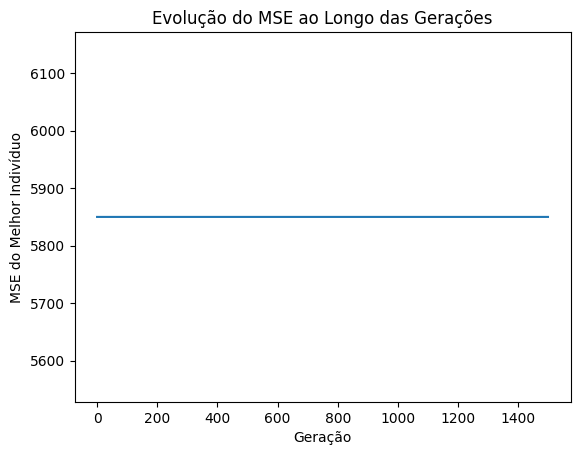

In [23]:
import matplotlib.pyplot as plt 

QUIT= False

epochs = 1500

MSE = np.zeros((epochs))  # Lista para armazenar o MSE de cada é

for generation in range(epochs):
    start_time = time.time()
    best_individual, CMSE = optimizator.selection()
    print(f"Geração {generation}: Melhor indivíduo: {best_individual}, Fitness: {CMSE:.6f}, Tempo: {time.time() - start_time:.2f}s")
    MSE[generation] = CMSE 
    if QUIT:
        break

plt.plot(range(epochs), MSE)
plt.xlabel('Geração')
plt.ylabel('MSE do Melhor Indivíduo')
plt.title('Evolução do MSE ao Longo das Gerações')